### Generate Random Data

In [4]:
import numpy as np
import math

L, d_k, d_v = 4, 8, 8
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [5]:
print("Q\n", q)
print("K\n", k)
print("V\n", v)

Q
 [[ 0.64203404 -1.54812562  0.59368779 -0.18706587 -0.21071046 -1.6601714
  -1.56503243 -0.60125935]
 [ 0.02355747  1.77077948 -2.12561828  0.99137987 -1.5266239  -0.54205352
  -2.39581061 -0.04190705]
 [-0.73519594 -0.75980014  1.74760179  0.40208626  2.3862207  -0.81339361
   0.37290214  0.20181364]
 [ 0.79689592 -0.49674382  0.46737059 -0.14632245  1.24785188 -0.49674868
  -0.89833007 -0.15773139]]
K
 [[-0.34182438 -0.64295477  0.13515098 -0.79509809  0.28467005 -0.01110096
  -0.26198818 -0.24187839]
 [-1.45410829 -1.59981007  0.80692506  0.41843943 -0.6547833   1.2347186
  -0.01487417 -2.10325616]
 [ 0.22712404  0.54877967 -2.7054669   0.12288883 -1.45323157  0.57948372
  -0.45944094 -0.09614356]
 [-0.60174385  0.2260894  -0.14313456  0.30639643 -0.49682902  1.991541
  -0.98108253 -0.19479913]]
V
 [[ 1.7734077  -1.00084503 -0.84925085 -1.93413573 -0.39975342 -0.14659278
  -2.99955169 -0.1284301 ]
 [-0.24656371 -1.04892397 -1.17965906 -0.2572015  -1.75540221  0.39590212
  -1.62740

In [6]:
np.matmul(q, k.T)

array([[ 1.51878324,  1.31991193, -2.2119335 , -2.42770995],
       [-2.01286359, -3.71344696,  9.85892708,  3.03178421],
       [ 1.19812182,  0.86624077, -9.39241964, -3.06693885],
       [ 0.86073578, -1.13347719, -3.04742679, -1.40076779]])

In [7]:
# Why we need sqrt(d_k) in denominator
q.var(), k.var(), np.matmul(q, k.T).var()

(1.2366095695802422, 0.8491487265169246, 15.38790378358706)

In [8]:
scaled = np.matmul(q, k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(1.2366095695802422, 0.8491487265169246, 1.9234879729483823)

In [9]:
scaled

array([[ 0.53697097,  0.46665934, -0.78203659, -0.85832508],
       [-0.71165475, -1.31290176,  3.4856571 ,  1.07189759],
       [ 0.42360003,  0.30626236, -3.32072181, -1.08432663],
       [ 0.30431605, -0.4007447 , -1.07742808, -0.4952462 ]])

In [10]:
mask = np.tril(np.ones( (L, L) ))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [11]:
mask[mask == 0] = -np.infty
mask[mask == 1] = 0

In [12]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [13]:
scaled + mask

array([[ 0.53697097,        -inf,        -inf,        -inf],
       [-0.71165475, -1.31290176,        -inf,        -inf],
       [ 0.42360003,  0.30626236, -3.32072181,        -inf],
       [ 0.30431605, -0.4007447 , -1.07742808, -0.4952462 ]])

In [14]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [15]:
attention = softmax(scaled + mask)

In [16]:
attention
     

array([[1.        , 0.        , 0.        , 0.        ],
       [0.64594155, 0.35405845, 0.        , 0.        ],
       [0.5227565 , 0.46487944, 0.01236406, 0.        ],
       [0.45563392, 0.22511895, 0.11442797, 0.20481916]])

In [17]:
new_v = np.matmul(attention, v)
new_v
     

array([[ 1.7734077 , -1.00084503, -0.84925085, -1.93413573, -0.39975342,
        -0.14659278, -2.99955169, -0.1284301 ],
       [ 1.05821976, -1.01786779, -0.96623466, -1.340403  , -0.87973233,
         0.04548212, -2.5137305 ,  0.01462948],
       [ 0.81314639, -1.00075094, -0.99300039, -1.11164978, -1.03349432,
         0.10128006, -2.30688125,  0.07223823],
       [ 0.76662154, -0.40755358, -1.06395345, -0.61073884, -0.5799191 ,
         0.07847175, -1.70884373,  0.30966756]])

In [18]:
v

array([[ 1.7734077 , -1.00084503, -0.84925085, -1.93413573, -0.39975342,
        -0.14659278, -2.99955169, -0.1284301 ],
       [-0.24656371, -1.04892397, -1.17965906, -0.2572015 , -1.75540221,
         0.39590212, -1.627402  ,  0.27562632],
       [ 0.05729441,  0.81449688, -0.05255186,  1.53670616, -0.68506827,
        -0.49614487,  1.43153764,  0.90932019],
       [ 0.03684672,  0.93446731, -1.97944837,  0.74493898,  0.37002101,
         0.55127741, -0.68155318,  0.98664744]])

In [19]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.shape[-1]
    scaled = np.matmul(q, k.T) / math.sqrt(d_k)
    if mask is not None:
        scaled = scaled + mask
    attention = softmax(scaled)
    out = np.matmul(attention, v)
    return out, attention

In [20]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[ 0.64203404 -1.54812562  0.59368779 -0.18706587 -0.21071046 -1.6601714
  -1.56503243 -0.60125935]
 [ 0.02355747  1.77077948 -2.12561828  0.99137987 -1.5266239  -0.54205352
  -2.39581061 -0.04190705]
 [-0.73519594 -0.75980014  1.74760179  0.40208626  2.3862207  -0.81339361
   0.37290214  0.20181364]
 [ 0.79689592 -0.49674382  0.46737059 -0.14632245  1.24785188 -0.49674868
  -0.89833007 -0.15773139]]
K
 [[-0.34182438 -0.64295477  0.13515098 -0.79509809  0.28467005 -0.01110096
  -0.26198818 -0.24187839]
 [-1.45410829 -1.59981007  0.80692506  0.41843943 -0.6547833   1.2347186
  -0.01487417 -2.10325616]
 [ 0.22712404  0.54877967 -2.7054669   0.12288883 -1.45323157  0.57948372
  -0.45944094 -0.09614356]
 [-0.60174385  0.2260894  -0.14313456  0.30639643 -0.49682902  1.991541
  -0.98108253 -0.19479913]]
V
 [[ 1.7734077  -1.00084503 -0.84925085 -1.93413573 -0.39975342 -0.14659278
  -2.99955169 -0.1284301 ]
 [-0.24656371 -1.04892397 -1.17965906 -0.2572015  -1.75540221  0.39590212
  -1.62740

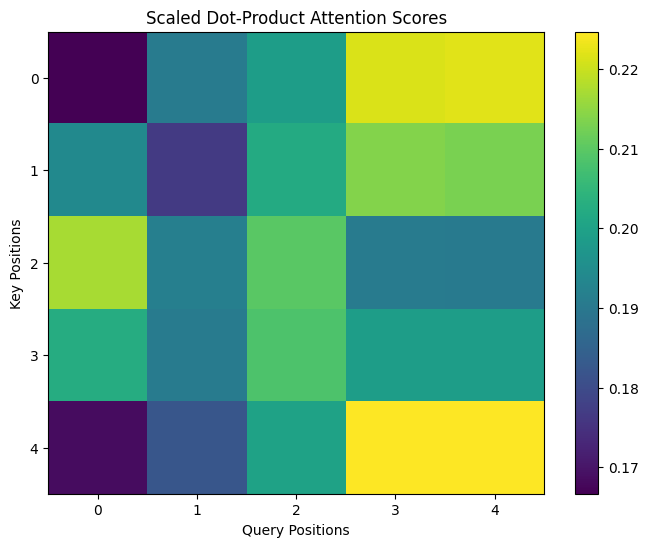

In [21]:
import matplotlib.pyplot as plt
q = np.random.rand(5, 3)  # Query
k = np.random.rand(5, 3)  # Key
v = np.random.rand(5, 4)  # Value

# Compute attention scores
output, attention_scores = scaled_dot_product_attention(q, k, v)

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(attention_scores, cmap='viridis', aspect='auto')
plt.title('Scaled Dot-Product Attention Scores')
plt.xlabel('Query Positions')
plt.ylabel('Key Positions')
plt.colorbar()
plt.show()